In [1]:
!pip install datasets
!pip install -q bitsandbytes accelerate loralib datasets
!pip install -q git+https://github.com/huggingface/transformers.git@main git+https://github.com/huggingface/peft.git

^C
ERROR: Operation cancelled by user


In [1]:
from training_utils import (
    run_job
)

'NoneType' object has no attribute 'cadam32bit_grad_fp32'


/Users/zachsmith/.pyenv/versions/3.12.2/lib/python3.12/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


STARTED
starting run: 0
loading model
finished loading model
loading data
finished loading data
training model


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch 1, Total Loss: 4.744084358215332
Total loss : 4.744084358215332


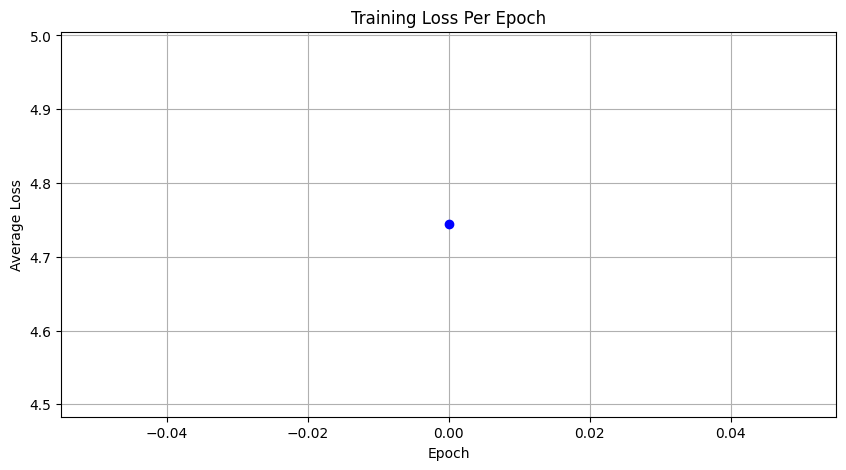

finished training model
predicting teacher on validation set
train_data_tokens:{'context': {'input_ids': tensor([[    2, 26644, 42531,     4,  3945,     5,   511, 11305, 30501, 23020,
            50, 40127,   338,  9354,     9,   349,    97,     6,  4420,    50,
           117,   116, 50118, 50118, 45641,   134,    35,   653,   109,  9545,
            11,  2030,  3466,   120,     7,  3529,   116, 50118, 45641,   176,
            35,   653,    16,  1789,   101,    11,  2030,  3466,   116, 50118,
         47895,    35,  4420, 50118, 50118, 45641,   134,    35,   653,   197,
            38,   109,     7,  1888,  2408,   116, 50118, 45641,   176,    35,
          1336,    64,    38,  2217,    41,  5004,  1280,     9,  2408,   116,
         50118, 47895,    35,   117, 50118, 50118, 45641,   134,    35,  1336,
            64,    38,  1649,     5, 21032,   819,    36,  7539,  3888,    43,
             9,   127,  3034,   116,  1534,    89,   143,  5936,  6410,   116,
         50118, 45641,   1

/Users/zachsmith/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


finished run in-domain val0
final result 0.0
predicting on paws_qqp
{'question1': 'Is losing weight possible without hitting the gym like a maniac?', 'question2': 'How can I lose weight without going to the gym?', 'label': 0, 'idx': 927}
student_prompt_tokens:{'input_ids': tensor([[    2, 13755,     5,   511, 11305, 30501, 23020,    50, 40127,   338,
          9354,     9,   349,    97,     6,  4420,    50,   117,   116, 50118,
         50118, 45641,   134,    35,  1534,  2086,  2408,   678,   396,  3022,
             5,  6545,   101,    10, 41288,   116, 50118, 45641,   176,    35,
          1336,    64,    38,  2217,  2408,   396,   164,     7,     5,  6545,
           116, 50118, 47895,    35]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])}


/Users/zachsmith/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


finished run ood 0
final result 0.0
FINISHED


In [2]:
# Models "opt-125m", "opt-350m", "opt-1.3b", "opt-2.6b"
# Datasets "mnli", "rte", "qqp"
runs = 1#4
dataset_used = 'qqp'
indomain = False
model_name = "opt-125m"
epochs = 1#20
val_len = 100
train_len = 32

for seed in range(runs):
    for context_len in [2]:#,16,32]:
        print("STARTED")
        run_job(dataset_used, model_name, epochs, val_len, train_len, context_len, seed)
        print("FINISHED")